Importing the necessary library 

In [180]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
from matplotlib import pyplot


%matplotlib inline

In [152]:
#Listing all your directory
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'prediction(classification).ipynb',
 'README.md',
 'sample_submission.csv',
 'starter-submission.csv',
 'starter-submission1.csv',
 'starter-submission2.csv',
 'Test.csv',
 'Train.csv',
 'VariableDefinitions.csv']

**READING THE CSV FILE**

In [181]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
variableDefined = pd.read_csv('VariableDefinitions.csv')

**DATA SUMMARY**

In [154]:
#checking for the columns
train.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

In [155]:
train.dtypes
#There are 19 variables in the columns with 5 categorical(object) variable and 14 numeric variables

user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                object
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object

In [156]:
train.info

<bound method DataFrame.info of                                          user_id       REGION        TENURE  \
0       dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063  SAINT-LOUIS  K > 24 month   
1       71c44b5ba328db5c4192a80f7cf8f244d9350ed0          NaN  K > 24 month   
2       ce46411b1526c94f20a383b8cb188f8d27f82a0a  TAMBACOUNDA  K > 24 month   
3       f467cdb6669818373c26c2bad44e01ba66f97d21       FATICK  K > 24 month   
4       ec45e1a1888a32b5dcce0954cfec20c6e037db31       FATICK  K > 24 month   
...                                          ...          ...           ...   
399995  a892ad4ed0eda8dc721733200c47147763b183ec  TAMBACOUNDA  K > 24 month   
399996  13daa3a651bf0192a413b339c4766aeafc6d1636          NaN  K > 24 month   
399997  767f596aee426962f7d92f4de8d7b232cdc17568          NaN  K > 24 month   
399998  b831e4d3b59a1e294e9e0a2aab391bc12d50845c          NaN  K > 24 month   
399999  a80e3a164986e489102cfb538fa62e16ecc28adf          NaN  K > 24 month   

        MONTANT  FR

In [157]:
train.describe(include ='all')

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
count,400000,242480,400000,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000,400000.000000,232671,232671.000000,400000.00000
unique,400000,14,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,111,NaN,NaN
top,649c16f0c7b4e69508550a01c1b1ed17e5ec8d83,DAKAR,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,All-net 500F=2000F;5d,NaN,NaN
freq,1,95517,379439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400000,NaN,58675,NaN,NaN
mean,NaN,NaN,NaN,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,NaN,28.046502,NaN,9.254209,0.18711
std,NaN,NaN,NaN,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,NaN,22.282773,NaN,12.305563,0.39000
min,NaN,NaN,NaN,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,1.000000,0.00000
25%,NaN,NaN,NaN,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,NaN,6.000000,NaN,2.000000,0.00000
50%,NaN,NaN,NaN,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,NaN,24.000000,NaN,5.000000,0.00000
75%,NaN,NaN,NaN,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,NaN,51.000000,NaN,12.000000,0.00000


**FINDING AND TREATING DUPLICATE CASES IN THE TEST AND TRAIN DATA SET**

In [182]:
print(train.shape)
print (train['user_id'].unique().shape)

# There are no duplicate cases

(400000, 19)
(400000,)


**CHECKING FOR THE MISSING/NULL VALUES**

In [158]:
train.isnull().sum()

user_id                0
REGION            157520
TENURE                 0
MONTANT           140277
FREQUENCE_RECH    140277
REVENUE           134663
ARPU_SEGMENT      134663
FREQUENCE         134663
DATA_VOLUME       196854
ON_NET            145819
ORANGE            166317
TIGO              239386
ZONE1             368310
ZONE2             374487
MRG                    0
REGULARITY             0
TOP_PACK          167329
FREQ_TOP_PACK     167329
CHURN                  0
dtype: int64

In [159]:
#To get the percentage of missing values in each column

percent_missing = train.isnull().sum() * 100 / len(train)
print(percent_missing.round(2))

user_id            0.00
REGION            39.38
TENURE             0.00
MONTANT           35.07
FREQUENCE_RECH    35.07
REVENUE           33.67
ARPU_SEGMENT      33.67
FREQUENCE         33.67
DATA_VOLUME       49.21
ON_NET            36.45
ORANGE            41.58
TIGO              59.85
ZONE1             92.08
ZONE2             93.62
MRG                0.00
REGULARITY         0.00
TOP_PACK          41.83
FREQ_TOP_PACK     41.83
CHURN              0.00
dtype: float64


Feaures zone1 and zone2 have 90percent missing values, it will be removed. MRG has same values all through,it means it has no variability so it will be removed. Tenure also has low variance nd will be removed as its not informative.

In [183]:
cols_to_drop = ['ZONE1', 'ZONE2', 'MRG']
for cols in cols_to_drop:    
    train.drop(cols, axis =1, inplace = True)
    test.drop(cols, axis = 1, inplace = True)

In [184]:
##Checking the number of unique values in the categorical variable
categorical_col = ['REGION', 'TENURE', 'TOP_PACK', 'CHURN']
for col in categorical_col:
    nuniq = train[col].nunique()
    print(col, nuniq)

REGION 14
TENURE 8
TOP_PACK 111
CHURN 2


In [185]:
# missing values in Tenure will be filled with the mode value. 
mode_train = train['TENURE'].mode()
train['TENURE'] = train['TENURE'].fillna(mode_train[0])
test['TENURE'].fillna(test['TENURE'].mode()[0], inplace = True)

In [186]:
# missing values in region and top_pack will be coded as a new category "UNKNOWN_REGION" and 'UNKNOWN_TOP_PACK'
train['REGION'].fillna('Unknown_region', inplace = True)
test['REGION'].fillna('Unknown_region', inplace = True)

train['TOP_PACK'].fillna('Unknown_topack', inplace = True)
test['TOP_PACK'].fillna('Unknown_topack', inplace = True)

In [187]:
# To fill in missing values for the rest of the numeric variables, 
# For the tree-based model, we will fill with -1
# For the other models, we will fill with the median, taking into consideration that the distribution is skewed

num_col = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE','ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'FREQ_TOP_PACK']

#for col in num_col:
#     test[col].fillna(-1, inplace = True)
#     train[col].fillna(-1, inplace = True)
    
for col in num_col:
    test[col].fillna(test[col].median(), inplace = True)
    train[col].fillna(test[col].median(), inplace = True)

**USING THE GROUPBY-FUNCTION**

In [165]:
train[['REGION', 'MONTANT', 'REVENUE', 'ARPU_SEGMENT', 'DATA_VOLUME', 'REGULARITY']].groupby('REGION').mean()

,MONTANT,REVENUE,ARPU_SEGMENT,DATA_VOLUME,REGULARITY
REGION,,,,,
DAKAR,6712.087283,6806.060115,2268.688495,3748.944931,37.861616
DIOURBEL,3587.986721,3560.832379,1186.948632,2255.854882,30.421120
FATICK,4341.308225,4369.779000,1456.600482,840.879482,38.479211
KAFFRINE,4483.809803,4524.079819,1508.034959,446.068451,38.702359
KAOLACK,4545.288992,4564.678750,1521.567731,1526.624931,37.658297
KEDOUGOU,6497.237569,6509.707182,2169.895028,1035.397790,32.204420
KOLDA,4891.919906,4939.798723,1646.602860,447.676707,40.237507
LOUGA,4474.577756,4494.365149,1498.130179,878.927780,38.515692
MATAM,4537.861275,4568.696670,1522.901427,1013.613701,34.895147


In [188]:
train[['CHURN', 'MONTANT','FREQUENCE_RECH','REVENUE', 'FREQUENCE', 'FREQ_TOP_PACK', 'DATA_VOLUME', 'REGULARITY', 'ON_NET']].groupby('CHURN').mean()

,MONTANT,FREQUENCE_RECH,REVENUE,FREQUENCE,FREQ_TOP_PACK,DATA_VOLUME,REGULARITY,ON_NET
CHURN,,,,,,,,
0,5045.912258,10.702217,5086.249699,13.20098,8.069351,2136.389862,33.168568,220.247952
1,2866.830220,6.544720,2818.849848,8.30430,4.890612,569.863369,5.793945,32.803939


In [189]:
train[['TENURE', 'REGULARITY']].groupby('TENURE').mean().T


TENURE,D 3-6 month,E 6-9 month,F 9-12 month,G 12-15 month,H 15-18 month,I 18-21 month,J 21-24 month,K > 24 month
REGULARITY,16.851351,31.348189,24.9345,22.849713,25.287773,25.316771,26.914839,28.202507


In [190]:
train[['CHURN', 'REGULARITY']].groupby('CHURN').median()

,REGULARITY
CHURN,
0,34
1,2


In [191]:
train[['CHURN', 'REGULARITY']].groupby('CHURN').mean()

,REGULARITY
CHURN,
0,33.168568
1,5.793945


In [169]:
#the label(CHURN) is imbalance
label_counts = train.groupby('CHURN').size() 
print(label_counts)

CHURN
0    325156
1     74844
dtype: int64


In [170]:
train[['REGULARITY','CHURN', 'REGION']].groupby('REGION').count()

,REGULARITY,CHURN
REGION,,
DAKAR,95517,95517
DIOURBEL,12576,12576
FATICK,6638,6638
KAFFRINE,8181,8181
KAOLACK,18042,18042
KEDOUGOU,181,181
KOLDA,7204,7204
LOUGA,18513,18513
MATAM,5255,5255


In [171]:
#to get the relationship between two variables
train.corr()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN
MONTANT,1.000000,0.808448,0.974696,0.974696,0.787252,0.275872,0.356312,0.672003,0.437056,0.493203,0.744960,-0.145367
FREQUENCE_RECH,0.808448,1.000000,0.812319,0.812319,0.952118,0.176732,0.425780,0.539957,0.363874,0.510911,0.864174,-0.148603
REVENUE,0.974696,0.812319,1.000000,1.000000,0.799557,0.284724,0.359752,0.676157,0.436096,0.501339,0.756084,-0.148293
ARPU_SEGMENT,0.974696,0.812319,1.000000,1.000000,0.799556,0.284724,0.359752,0.676157,0.436096,0.501338,0.756083,-0.148293
FREQUENCE,0.787252,0.952118,0.799557,0.799556,1.000000,0.192942,0.415416,0.496440,0.331198,0.537958,0.835913,-0.156751
DATA_VOLUME,0.275872,0.176732,0.284724,0.284724,0.192942,1.000000,0.008351,0.058539,0.036562,0.203505,0.140637,-0.068731
ON_NET,0.356312,0.425780,0.359752,0.359752,0.415416,0.008351,1.000000,0.253662,0.168969,0.289740,0.380560,-0.103455
ORANGE,0.672003,0.539957,0.676157,0.676157,0.496440,0.058539,0.253662,1.000000,0.433193,0.330834,0.574031,-0.116828
TIGO,0.437056,0.363874,0.436096,0.436096,0.331198,0.036562,0.168969,0.433193,1.000000,0.215773,0.385078,-0.077468
REGULARITY,0.493203,0.510911,0.501339,0.501338,0.537958,0.203505,0.289740,0.330834,0.215773,1.000000,0.422553,-0.479120


Revenue and ARPU SEGMENT  are totally correlated and have same correlation with others. we drop them
Also, montant and revenue are highly collinear,they could represent the same thing.One of them will be removed.

**DATA VISUALIZATION**

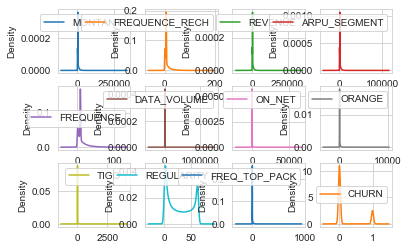

In [174]:
train.plot(kind='density', subplots=True, layout=(3,4), sharex=False)
pyplot.show()
def count_plot(categorical, data):
    fig = plt.figure(edgecolor='white', figsize =(18,6))
    axes = fig.add_axes()


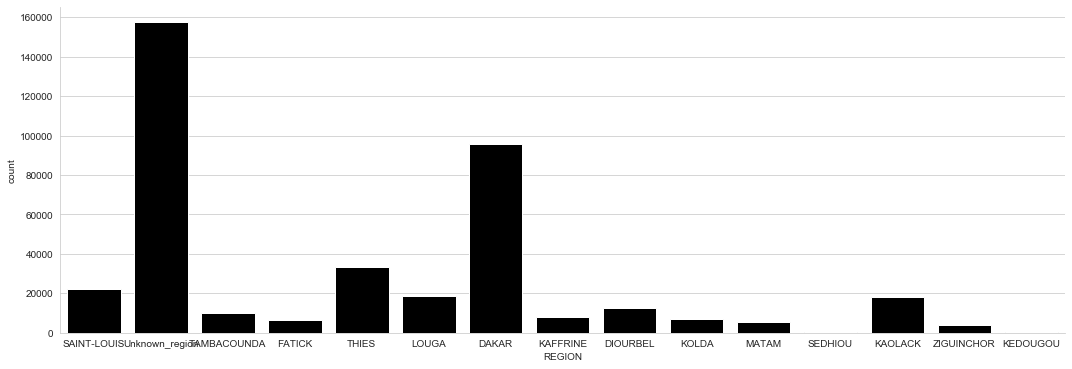

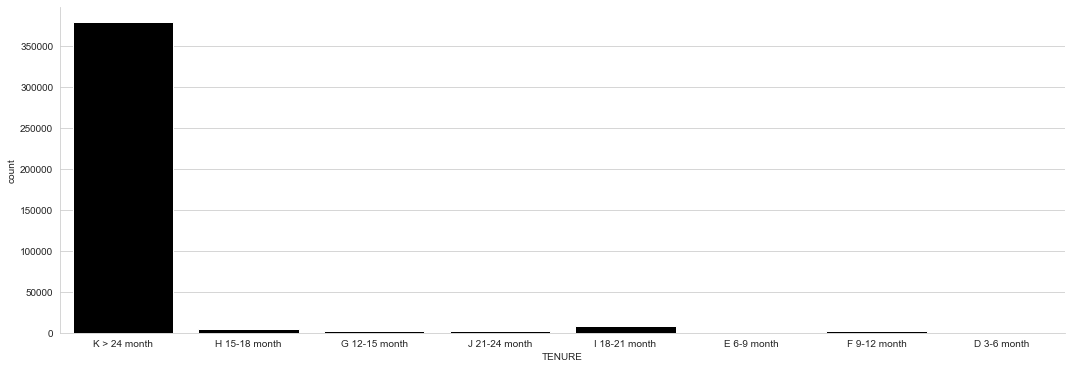

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


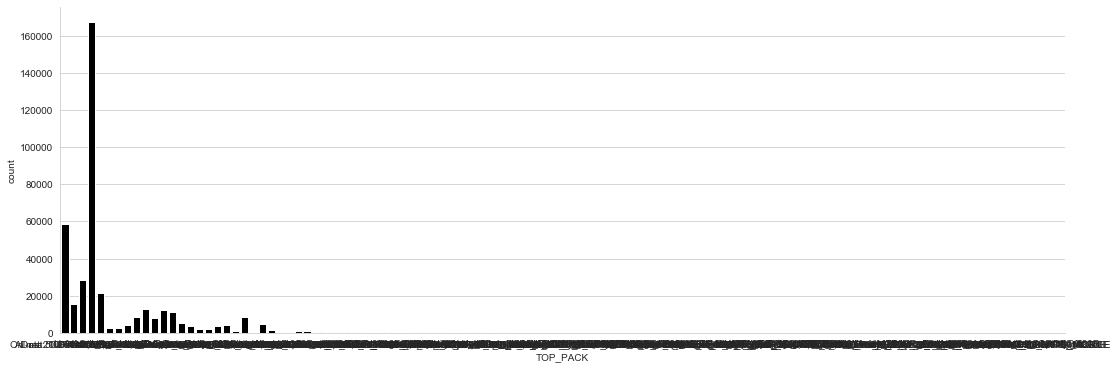

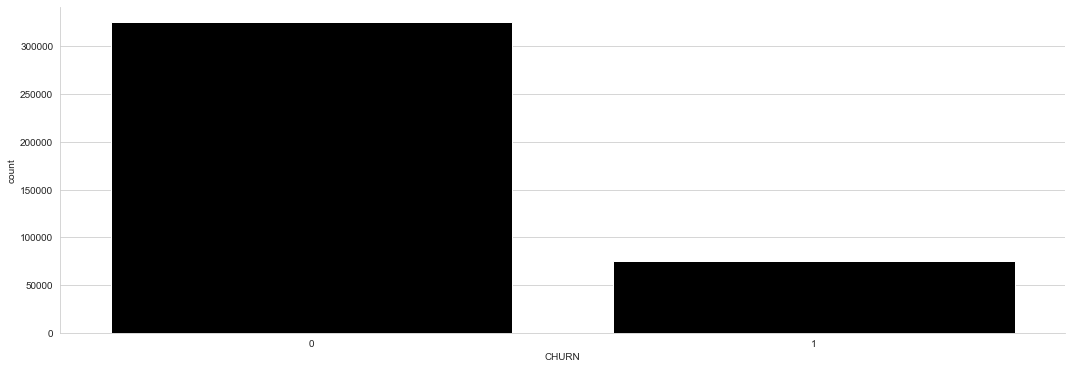

In [175]:
#count_plot for a categorical variable
def count_plot(categorical, data):
    fig = plt.figure(edgecolor='white', figsize =(18,6))
    axes = fig.add_axes()
    sns.countplot(x = categorical, data = data, color = 'black', saturation=0.2, ax = axes)
#     sns.set_style()
    sns.despine()
#     rcParams['figure.figsize'] = 16,8
#     rcParams['axes.spines.top'] = False
#     rcParams['lines.linewidth'] = 2.5

for i in categorical_col:
    count_plot(i, train)

FEATURE ENGINEERING

In [195]:
#adding orange and tigo together gives off_net_call
#adding off_net to on_net gives total_call_connection
train['OFF_NET_CALL'] = train['ORANGE'] + train['TIGO']
test['OFF_NET_CALL'] = test['ORANGE'] + test['TIGO']

train['TOTAL_CALL_CONNECTION'] = train['OFF_NET_CALL'] + train['ON_NET']
test['TOTAL_CALL_CONNECTION'] = test['OFF_NET_CALL'] + test['ON_NET']

Drop Redundant Columns¶

In [196]:
dataset = [train, test]
for j in dataset:
    j.drop('user_id', axis = 1, inplace = True)
    j.drop('TIGO', axis = 1, inplace = True)
    j.drop('ORANGE', axis = 1, inplace = True)
    j.drop('ARPU_SEGMENT', axis = 1, inplace = True)
    j.drop('TENURE', axis = 1, inplace = True)
    

**EXPLORATORY DATA ANALYSIS**

This is done after dealing with missing values and dropping redundant columns

In [197]:
train.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,FREQ_TOP_PACK,CHURN,OFF_NET_CALL,TOTAL_CALL_CONNECTION
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.00000,400000.000000,400000.000000,400000.000000,400000.00000,400000.000000,400000.000000
mean,4638.184218,9.924307,4661.996512,12.284762,1843.27709,185.175302,28.046502,7.474577,0.18711,80.333388,265.508690
std,5846.168099,10.911098,5963.116995,12.183044,8888.92481,706.616942,22.282773,9.616928,0.39000,181.445622,774.165888
min,20.000000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000
25%,2000.000000,4.000000,1900.000000,6.000000,240.00000,12.000000,6.000000,4.000000,0.00000,27.000000,41.000000
50%,3000.000000,7.000000,3000.000000,9.000000,268.00000,27.000000,24.000000,5.000000,0.00000,34.000000,61.000000
75%,4600.000000,10.000000,4698.000000,13.000000,301.00000,55.000000,51.000000,6.000000,0.00000,51.000000,140.000000
max,226550.000000,133.000000,233413.000000,91.000000,934576.00000,45011.000000,62.000000,629.000000,1.00000,6794.000000,45048.000000


To visualize univariate(numeric)

In [198]:
cat_col = ['region', 'tenure', 'top_pack', 'churn']
num_col = ['montant', 'frequence_rech', 'revenue','arpu_segment', 'frequence', 'data_volume', 'on_net',
           'freq_top_pack', 'regularity', 'call_volume']

In [199]:
#To get the percentage of missing values in each column
percent_missing = train.isnull().sum()*100/len(train)
print(percent_missing.round(2))

REGION                   0.0
MONTANT                  0.0
FREQUENCE_RECH           0.0
REVENUE                  0.0
FREQUENCE                0.0
DATA_VOLUME              0.0
ON_NET                   0.0
REGULARITY               0.0
TOP_PACK                 0.0
FREQ_TOP_PACK            0.0
CHURN                    0.0
OFF_NET_CALL             0.0
TOTAL_CALL_CONNECTION    0.0
dtype: float64


**DATA TRANSFORMS(PRE-PROCESSING)**
#encoding the categorical variables with LabelEncoder and OneHotEncoder

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#for i in ['REGION','TOP_PACK']:
    #train[i] = LabelEncoder().fit_transform(train[i])
    #test[i] = LabelEncoder().fit_transform(test[i])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
for i in ['REGION','TOP_PACK']:
    X[i] = OneHotEncoder().fit_transform(X[i].values.reshape(-1,1)).toarray()
    
    X_test[i] = OneHotEncoder().fit_transform(X_test[i].values.reshape(-1,1)).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_vali,y_train,y_vali = train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 42)

In [ ]:
#stratify y to ensure the target "CHURN" is evenly distributed in the train and validation sets

In [ ]:
#scaling our dataset(preprocessing)

In [ ]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline
#from sklearn import tree

In [ ]:
#from sklearn.pipeline import Pipeline this is 

In [ ]:
#pipe = Pipeline([('scaler',StandardScaler()),('model',LogisticRegression())])

In [ ]:
#pipe.fit(X_train,y_train)

In [ ]:
#prediction = pipe.predict(X_vali)

In [ ]:
#from sklearn.metrics import log_loss, accuracy_score

#score = accuracy_score(y_vali,prediction)
#print('Accuracy on validation set:', score)

**MAKING PREDICTION AND SAVE TO A SUBMISSION FILE**

In [ ]:
#pipe.fit(X,y)

In [ ]:
#pred = pipe.predict_proba(X_test)[:,1]

In [ ]:
#pd.DataFrame({'user_id':test['user_id'],'CHURN':pred}).to_csv('starter-submission.csv',index =False)

IMPROVING THE MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import log_loss

In [ ]:
#pipe = Pipeline([('scaler',StandardScaler()),('model',RandomForestClassifier())])
#pipe.fit(X_train,y_train)
#prediction = pipe.predict(X_vali)

In [ ]:
#from sklearn.metrics import log_loss, accuracy_score

#score = accuracy_score(y_vali,prediction)
#print('Accuracy on validation set:', score)

In [ ]:
#pipe.fit(X,y)

In [ ]:
#pred = pipe.predict_proba(X_test)[:,1]

In [ ]:
#pd.DataFrame({'user_id':test['user_id'],'CHURN':pred}).to_csv('starter-submission1.csv',index =False)

In [ ]:
pipe = Pipeline([('scaler',StandardScaler()),('model',KNeighborsClassifier())])
pipe.fit(X_train,y_train)
prediction = pipe.predict(X_vali)

In [ ]:
from sklearn.metrics import log_loss, accuracy_score

score = accuracy_score(y_vali,prediction)
print('Accuracy on validation set:', score)

In [ ]:
pipe.fit(X,y)

In [ ]:
pred = pipe.predict_proba(X_test)[:,1]

In [ ]:
pd.DataFrame({'user_id':test['user_id'],'CHURN':pred}).to_csv('starter-submission2.csv',index =False)